## Week 3: Ensemble Methods

1. Reference

* Text/Website:

  1) "An Introduction to Statistical Learning with Applications in R" (ISLR) [링크 텍스트](https://www.statlearning.com/)
  
  2) "An Introduction to Statistical Learning with Applications in Python" (ISLR) [링크 텍스트](https://www.statlearning.com/)

  3)https://www.kaggle.com/code/satishgunjal/ensemble-learning-bagging-boosting-stacking

  4)https://www.kaggle.com/code/faressayah/decision-trees-random-forest-for-beginners#1.-Decis

  5)https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python#Second-Level-Predictions-from-the-First-level-Output

* Dataset: Bank_Personal_Loan_Modelling.csv
https://www.kaggle.com/code/farzadnekouei/imbalanced-personal-bank-loan-classification/input

* Copied https://www.kaggle.com/code/farzadnekouei/imbalanced-personal-bank-loan-classification/notebook

2. Introduction

  **What is Ensemble Model?**



*   여러 개의 기계학습 모델을 결합하여 단일 모델보다 더 나은 예측 성능을 얻기 위한 기법
*   개별 모델이 가진 약점을 보완하고 강점을 합쳐 최종 예측을 개선하는 것이 목적

  **Why Ensemble?**


*   Bias reduction
*   Variance reduction (과적합 방지)
*   Reliability Improvement

  **Ensemble Methods**


* Bagging
* Boosting
* Stacking  



### About the Dataset

In [4]:
from google.colab import files

uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [7]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1



*   **ID**: ID of the customer
*   **Age**: Age of the customer in completed years
* **Experience**: Amount of work experience in years
* **Income**: Amount of annual income (in thousands)
* **Zipcode**: Postal code in which the client lives
* **Family**: Number of family members
* **CCAvg**: Average monthly spending with the credit card (in thousands)
* **Education**: Education level (1: bachelor's degree, 2: master's degree, 3: advanced/professional degree)
* **Mortgage**: Value of home mortgage, if any (in thousands)
* **Securities Account**: Does the customer have a securities account (증권 계좌) with the bank?
* **CD Account**: Does the customer have a certificate of deposit account (CD, 정기 예금 계좌의 일종) with the bank?
* **Online**: Does the customer use the Internet banking facilities?
* **CreditCard**: Does the customer use a credit card issued by the bank?
* **Personal Loan**: Did this customer accept the personal loan offered in the last campaign? (Target variable)



### Defining Business Problem and Goal

* The majority of Thera-Bank's customers are depositers.
* The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in **quickly expanding this base to do more loan business while earning more through loan interest.**
* In particular, management wants to look for ways to convert its liability customers into retail loan customers while keeping them as depositers.
* A campaign the bank ran last year for deposit customers showed a conversion rate of over 9.6% success. This has prompted the retail marketing department to develop campaigns with better target marketing to increase the success rate with a minimal budget.
* **The department would like to develop a classifier that will help them identify the potential customers who are more likely to purchase the loan.** This will increase the success rate while reducing the cost of the campaign.

  그러니까 누가 대출을 받을 것이냐? 분류기를 통해 타겟층을 식별해서 캠페인을 성공시키는 것이 목적

In [8]:
df.shape

(5000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

**→ imbalanced**

### Exploratory Data Analysis (EDA)

In [11]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=a45a65373b7f520298c3003a2c92d40fd591c05c333fefdbbd8418e756917250
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [12]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.drop('ID', axis=1, inplace=True)

Correlation Analysis

In [14]:
# Define a colormap

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1, 1, 1)), (1, (0.25, 0.41, 0.88))])
royalblue_r = royalblue.reversed()

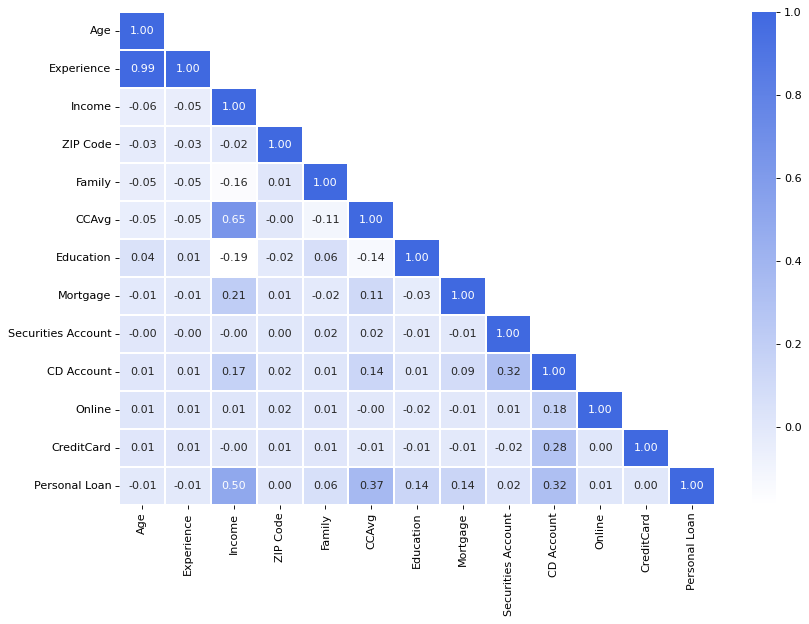

In [15]:
target = 'Personal Loan'
df_ordered = pd.concat([df.drop(target, axis=1), df[target]], axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True # 상삼각행렬 지워

# Plot the heatmap correlation
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()



*   Personal Loan is somewhat correlated with Income(0.5), CCAvg(0.37), and CD_Account(0.32).
*   Experience is highly correlated with Age(0.99).
*   CCAvg is correlated with Income(0.65).



### Data Cleansing

Noise Treatment

1) ZIP Code Noise Treatment

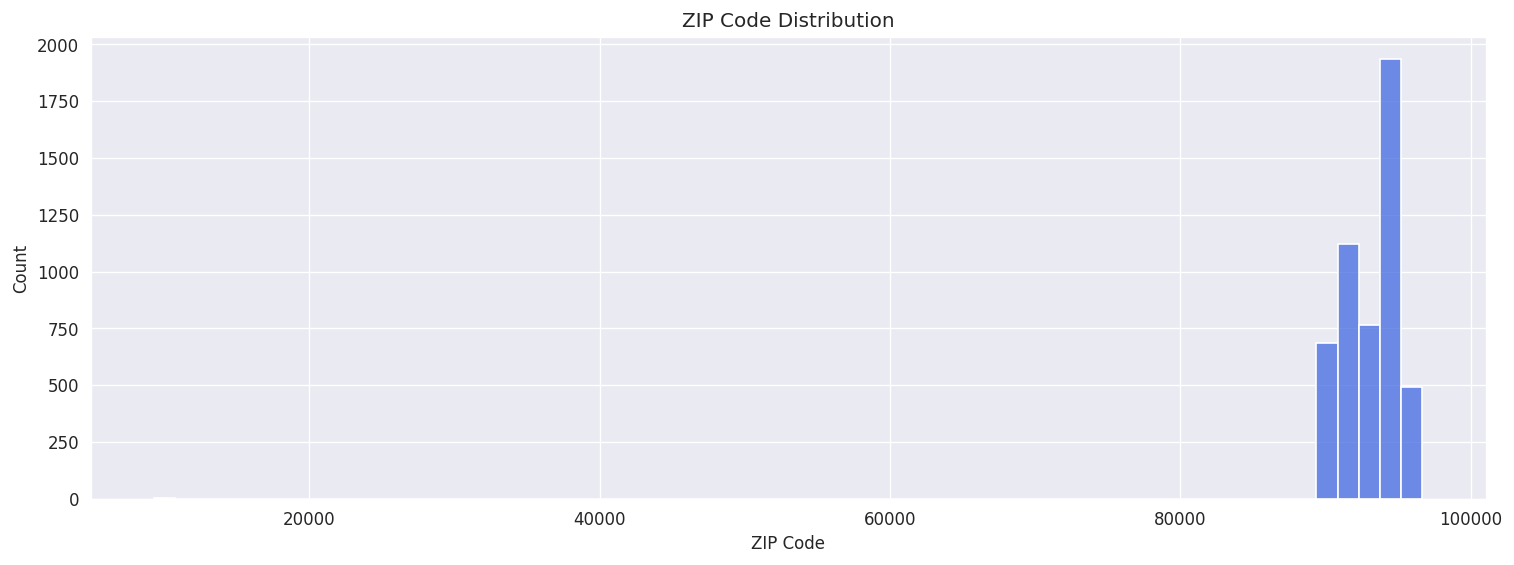

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5), dpi=120)
sns.histplot(x='ZIP Code', data=df, bins=60, color='royalblue')

plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.title('ZIP Code Distribution')
plt.show()

In [17]:
df[df['ZIP Code']<20000]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [18]:
df.drop(df[df['ZIP Code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace=True)

2) Experience Noise Treatment

In [19]:
df[df['Experience']<0]['Experience'].count()

52

In [20]:
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [21]:
df['Experience'] = df['Experience'].abs()

Outlier Treatment

1) Mortgage

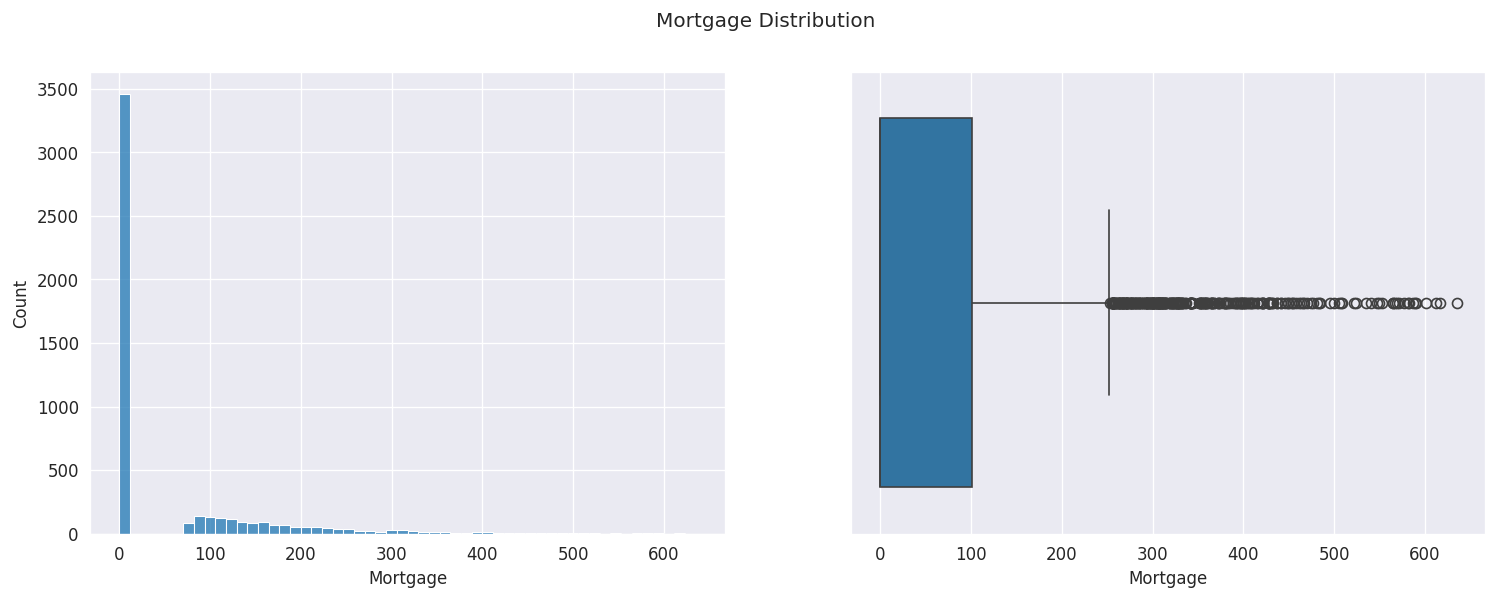

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=120)
sns.histplot(x='Mortgage', data=df, ax=ax[0])
sns.boxplot(x='Mortgage', data=df, ax=ax[1])
plt.suptitle('Mortgage Distribution')
plt.show()

The **Z-score** method for outlier detection is a statistical technique used to detect outliers from data sets by calculating how many standard deviations away from the mean each data point is. A data point with a Z score of more than 3 standard deviation away from the mean is considered an outlier. We use the **scipy.stats** module to perform the zscore technique:

In [23]:
from scipy import stats

df[stats.zscore(df['Mortgage'])>3]['Mortgage'].count()

105

In [24]:
outlier_indices = df[stats.zscore(df['Mortgage'])>3].index
df.drop(outlier_indices, inplace=True)
df.reset_index(drop=True, inplace=True)

Missing Value Treatment

In [25]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Feature Transformation

CCAvg는 월별 신용카드 소비액인 반면 Income은 연 소득이기 때문에 convert average monthly credit card spending to annual:

In [26]:
df['CCAvg'] = df['CCAvg']*12

Dropping Unuseful Columns

In [27]:
df.drop('Experience', axis=1, inplace=True)

### Train Test Split

In [28]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

참고) The approach for model evaluation when dealing with imbalanced datasets

* Recall is a measure of the proportion of actual positive cases that were correctly identified by the model. A high recall score means that the model has a low number of false negatives, which is desirable in this project because it means that the model is not missing many potential loan customers.

 실제 positive인 애들 중에서 모델이 positive라고 맞게 예측한애들 (TP/(TP+FN)). 실제 양성인 애들을 얼마나 잘 골라내는지

* Precision is a measure of the proportion of positive cases identified by the model that are actually positive. A high precision score means that the model has a low number of false positives, which is desirable in this project because it means that the model is not identifying many non-loan customers as potential loan customers.

 모델이 positive라고 예측한 애들 중에서 실제로 positive인 애들 (TP/(TP+FP)).

* F1-score is a measure of the trade-off between recall and precision. It is calculated as the harmonic mean of recall and precision. A high F1-score indicates a balance between high recall and high precision.

  이 프로젝트에서는 class 1인 애들의 recall과 precision이 중요

  그러니까 f1_score 마지막 아규먼트로 average='binary'를 줘서 class 1인 애들의 f1값을 비교해보자

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

### Decision Tree

1. What is Decision Tree?

A Decision Tree is a tree-based supervised learning algorithm that can be used for classification or regression tasks. It works by recursively splitting the data into subsets based on the values of the features, with the goal of minimizing a cost function, such as Gini impurity or entropy.

**Advantages**

▲ Easy to understand and interpret.

▲ Handles both numerical and categorical data.

▲ Feature selection: Important features will appear near the root of the tree.

▲ Non-parametric: They make no assumptions about the underlying distribution of the data.

**Disadvantages**

▼ Overfitting: Especailly with deep trees or with small training sets, modeling can result in a poor generalization to new data.

▼ Instability: Small changes in the data can result in large changes in the tree.

▼ Bias towards features with many categories: Decision Trees can be biased towards features with many categories, as they may dominate the construction of the tree.

▼ Poor approximation of complex functions: They are limited by the axis-parallel splits at each node.

**Note**: Decision Trees do not require standard scaling of the data before model bulding. Standard scaling is typically used for algorithms that are sensitive to the scale of the input features, such as distance-based algorithms like KNN and SVM.


2-1. Decision Tree Algorithm: Regression Trees

Saving Regression Trees 1.jpg to Regression Trees 1.jpg


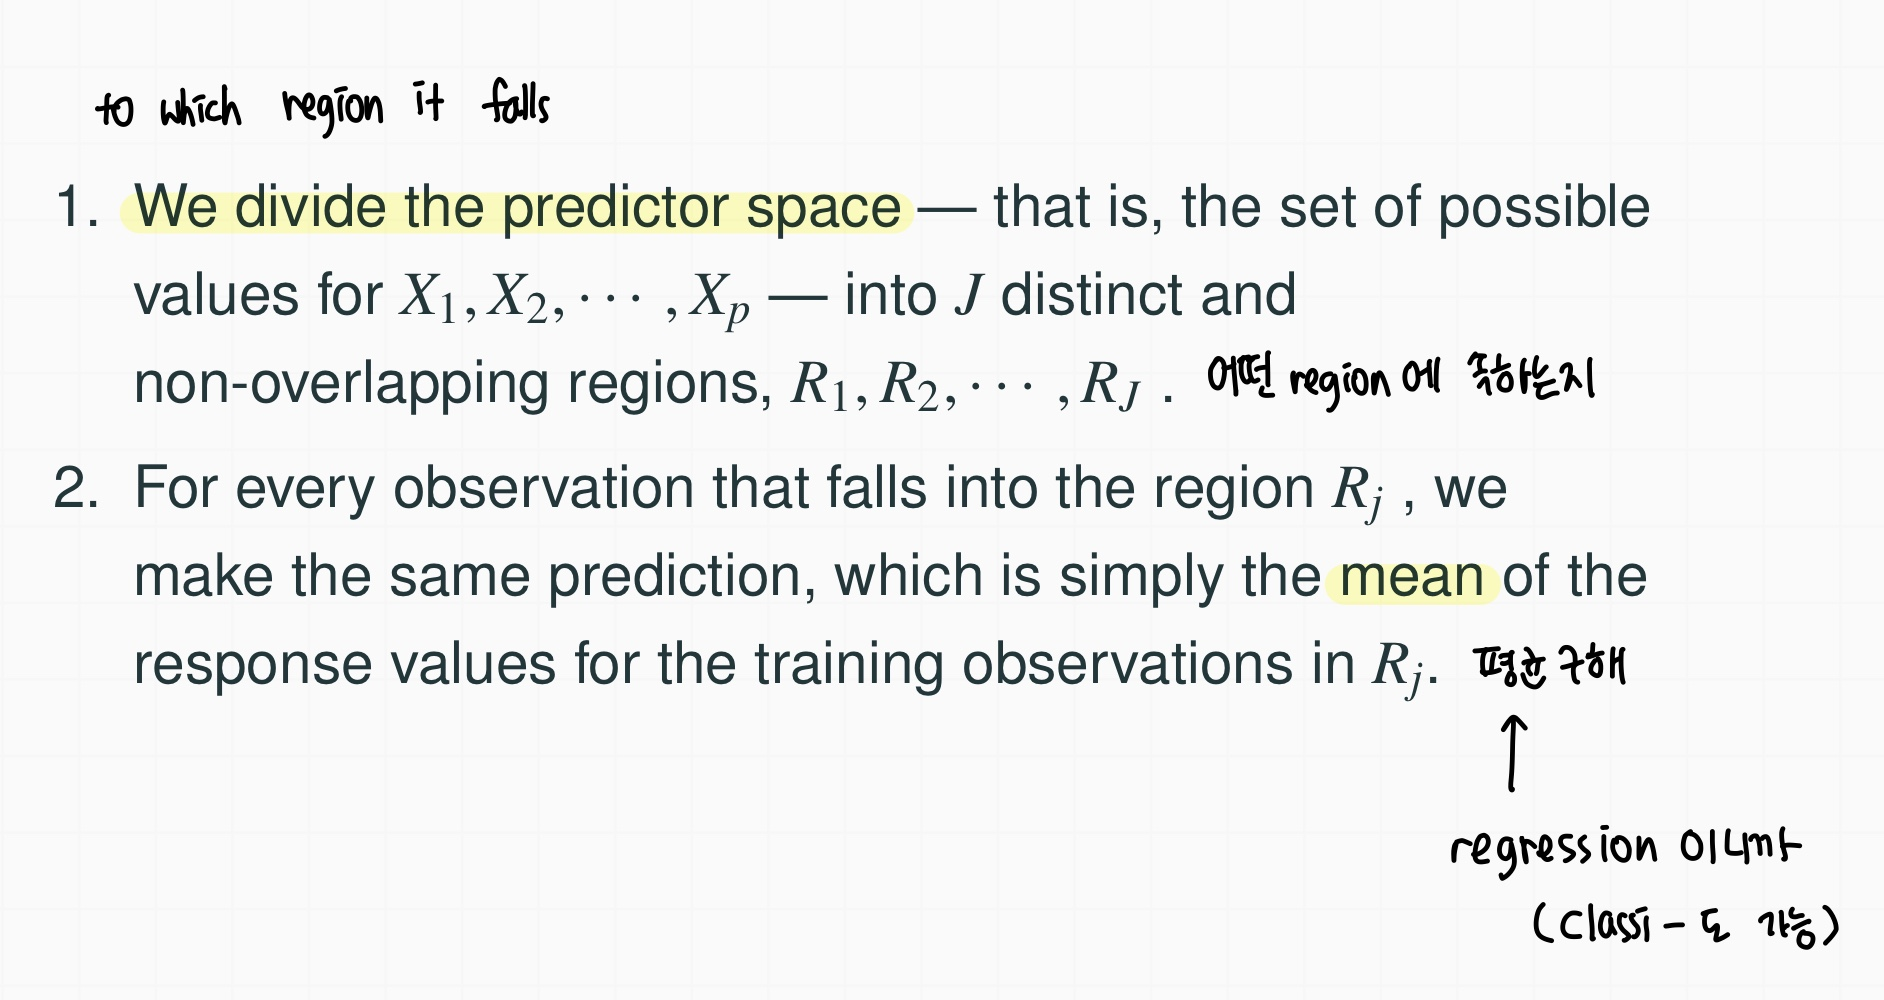

In [32]:
uploaded = files.upload()
from IPython.display import Image
display(Image('/content/Regression Trees 1.jpg'))

Saving Regression Trees 2.jpg to Regression Trees 2.jpg


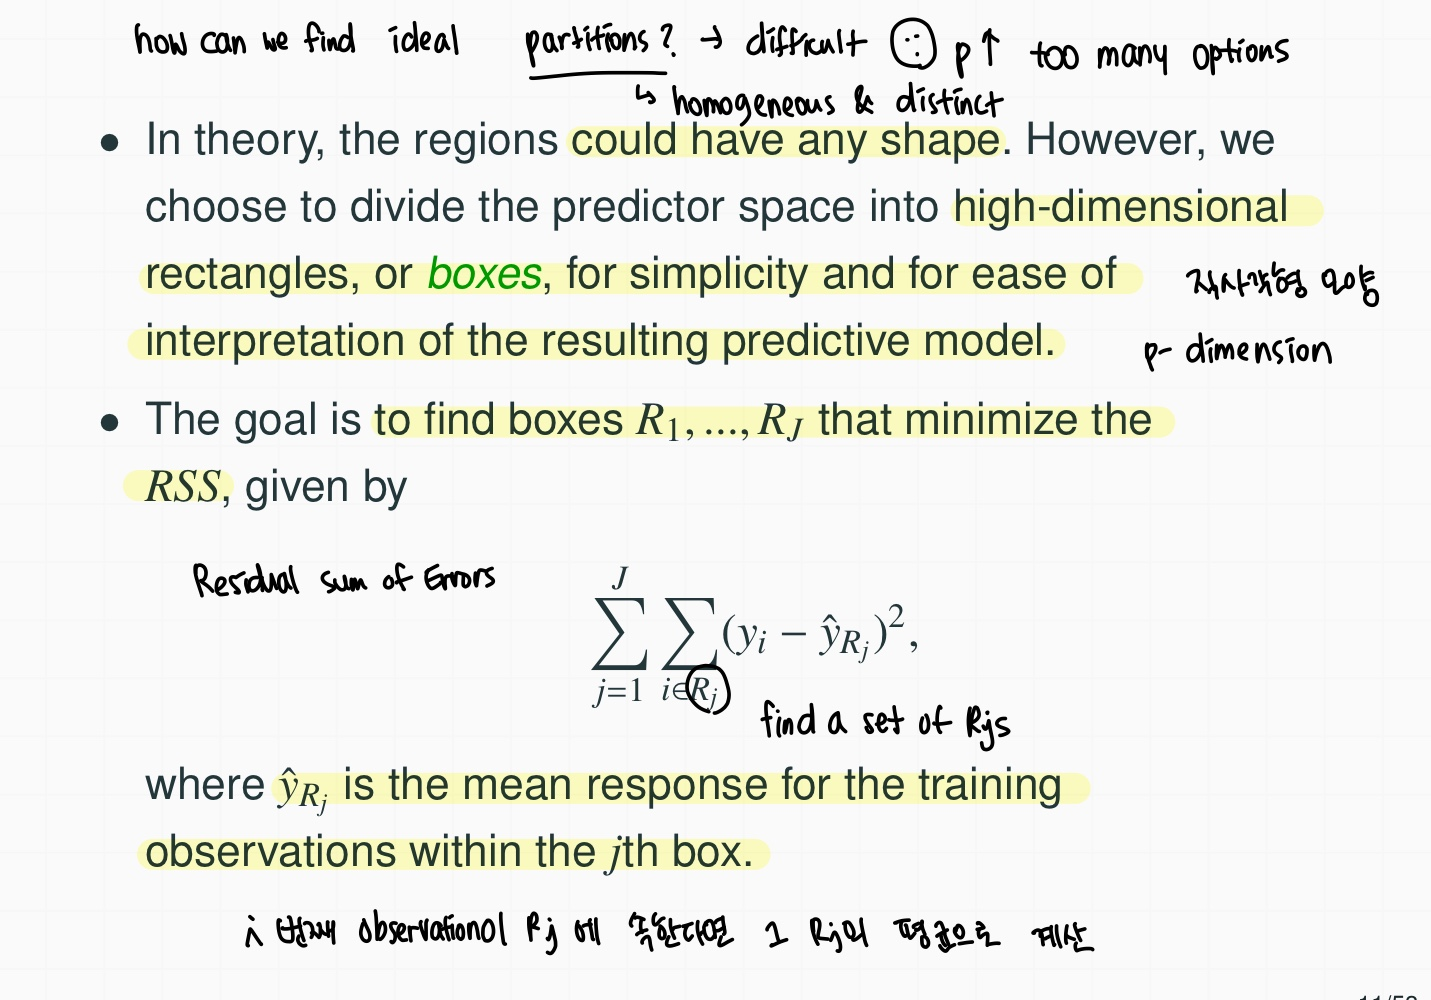

In [33]:
uploaded = files.upload()
display(Image('/content/Regression Trees 2.jpg'))

2-2. Decision Tree Algorithm: Classification Trees

Saving Classification Trees 1.jpg to Classification Trees 1.jpg


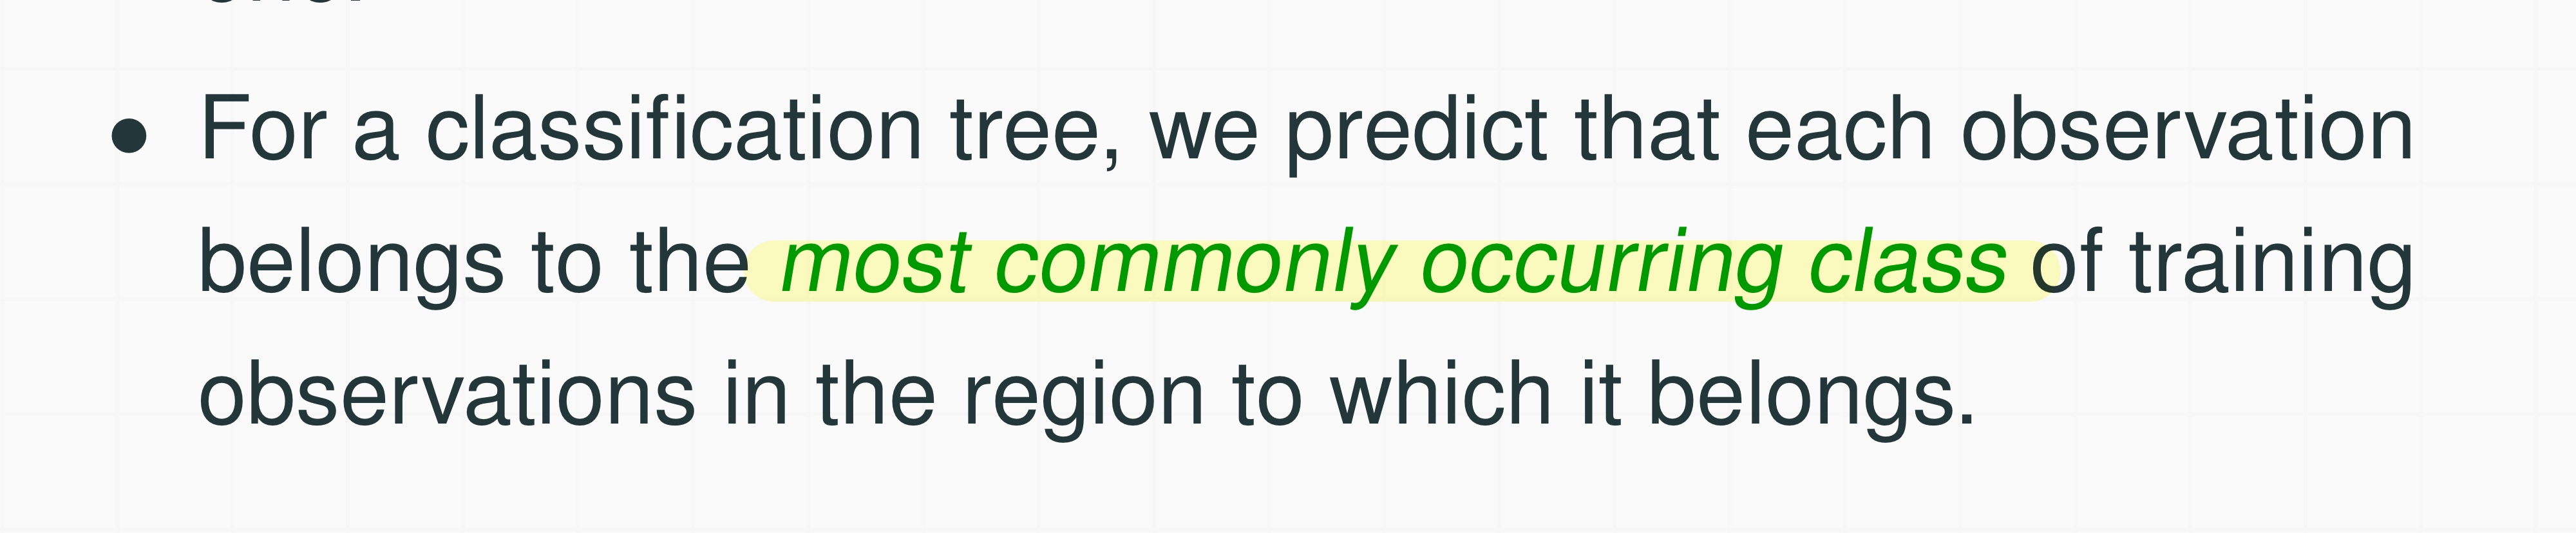

In [34]:
uploaded = files.upload()
display(Image('/content/Classification Trees 1.jpg'))

Saving Classification Trees 2.jpg to Classification Trees 2.jpg


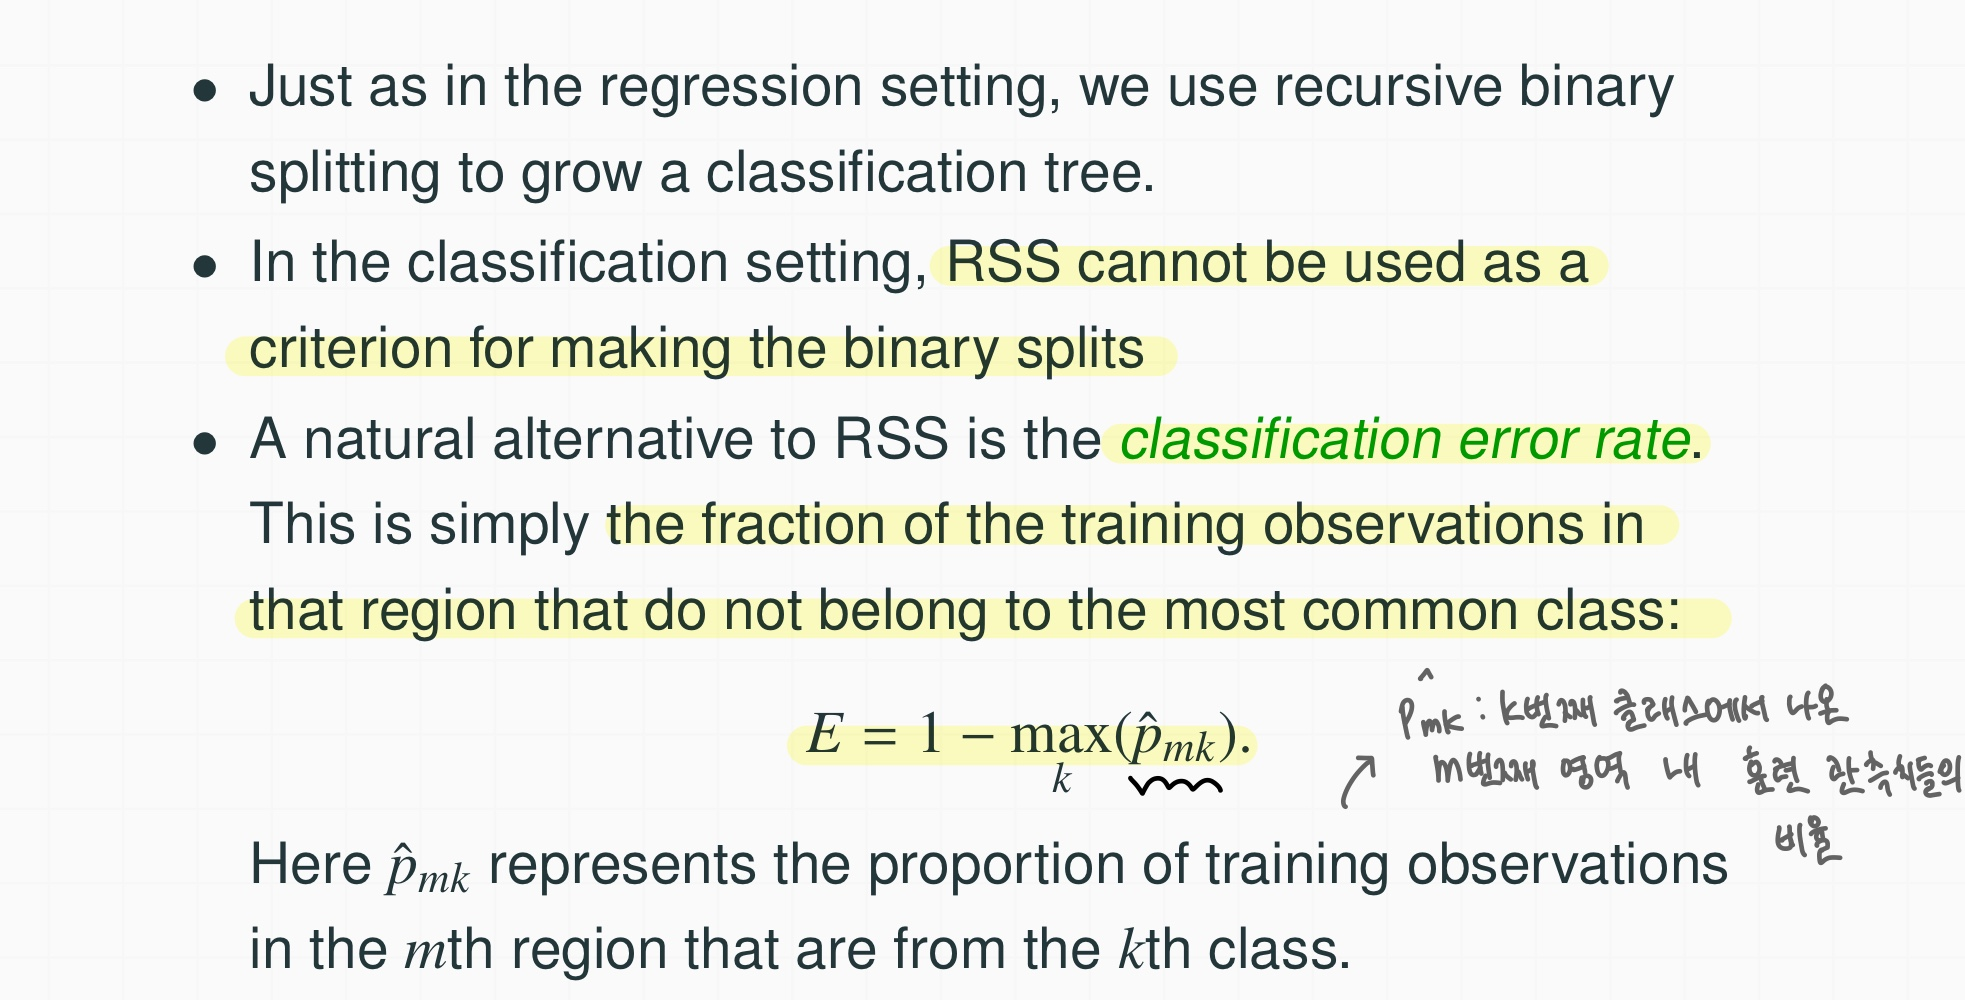

In [35]:
uploaded = files.upload()
display(Image('/content/Classification Trees 2.jpg'))

3. Hyperparameters for Decision Tree Classifiers

*   **Criterion**: determines the criterion used to measure the quality of a split. Commonly used criteria are "Gini Impurity" and "Information Gain."

*   **Maximum depth**: The deeper the tree is, the more complex it becomes, which can lead to overfitting. Setting a maximum depth can prevent overfitting by limiting the size of the tree.

*   **Minimum samples per split**: If the number of samples at a node is less than this value, the node cannot be split further. This can also prevent overfitting by limiting the size of the tree.

*    **Minimum samples per leaf**: If a leaf node has fewer samples than this value, it can be removed.

*   **Maximum features**: determines the maximum number of features to consider when splitting a node. It is used to prevent overfitting by reducing the complexity of the model.

*   **Class_weight**: Weights associated with classes. (클래스 불균형 문제를 다룰 때 유용. 각 클래스에 가중치를 부여하는 방법)

  

In [36]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

In [38]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [39]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

print_score(dt, X_train, y_train, X_test, y_test, train=True)
print_score(dt, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3569.0  346.0       1.0     3915.0        3915.0
_______________________________________________
Confusion Matrix: 
 [[3569    0]
 [   0  346]]

Test Result:
Accuracy Score: 97.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.985507   0.902439   0.97855    0.943973      0.978125
recall       0.991031   0.850575   0.97855    0.920803      0.978550
f1-score     0.988262   0.875740   0.97855    0.932001      0.978262
support    892.000000  87.000000   0.97855  979.000000    979.000000
___________________________________________

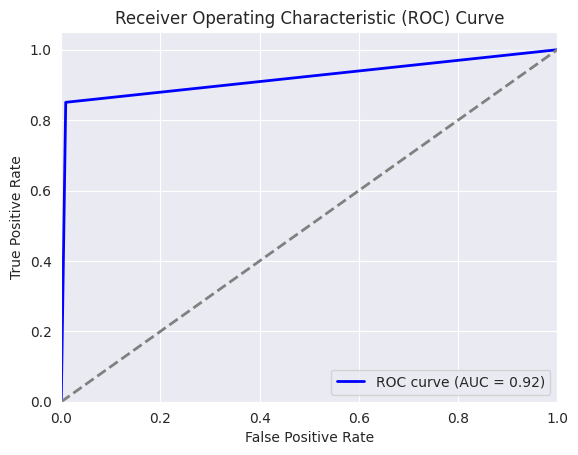

In [40]:
dt_y_scores = dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, dt_y_scores)

roc_auc = roc_auc_score(y_test, dt_y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

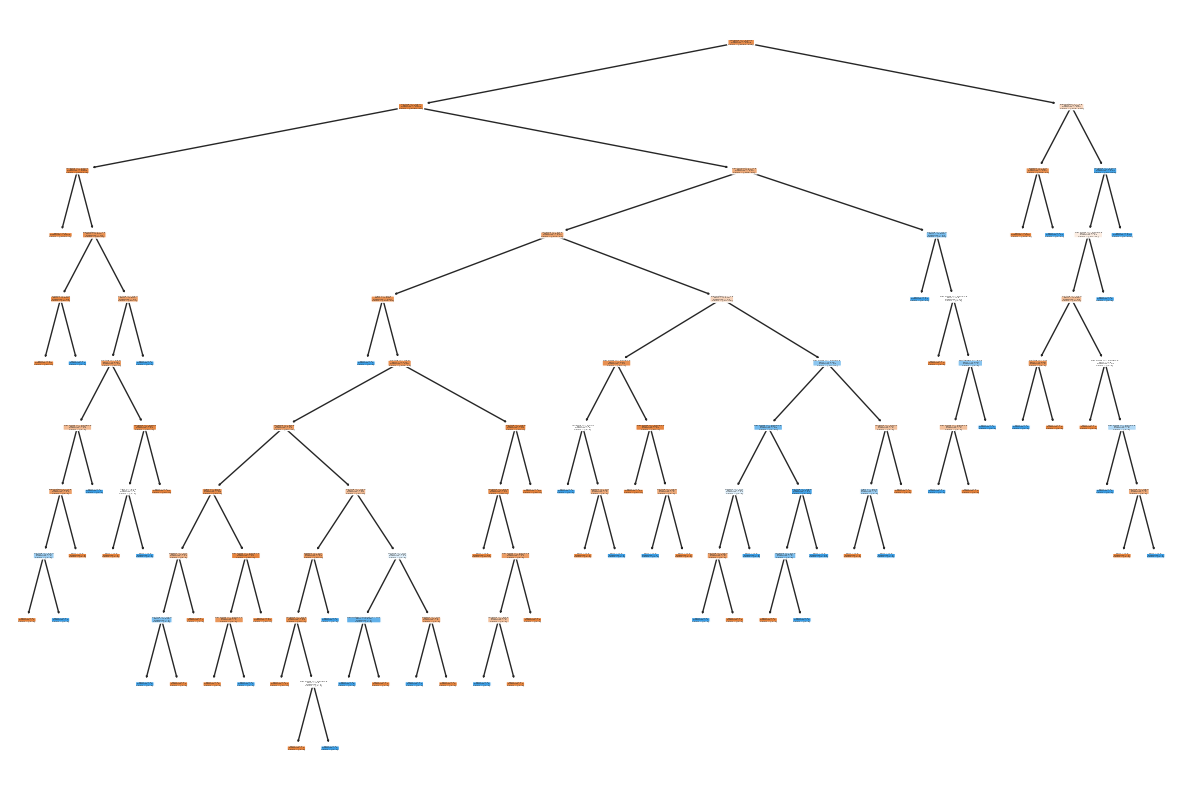

In [41]:
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [43]:
params = {'criterion': ('gini', 'entropy'),
          'max_depth': (list(range(1, 20))),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': list(range(1, 20)),
          'max_features': (None, 'sqrt', 'log2')}

In [45]:
dt_cv = GridSearchCV(
    dt,
    params,
    scoring='f1',
    n_jobs=-1, # number of cores used for the training process. if -1, all cores are used
    verbose=1, # controls whether I want to output any text during the learning proces.
    cv=5
)

In [46]:
dt_cv.fit(X_train, y_train)
best_params = dt_cv.best_params_
print(f"Best parameters: {best_params})")

# doesn't work ..................

Fitting 5 folds for each of 6498 candidates, totalling 32490 fits


KeyboardInterrupt: 

In [47]:
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=9, max_features=None,
                                  min_samples_leaf=6, min_samples_split=2, random_state=0)

In [48]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, random_state=0)

In [49]:
print_score(dt_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(dt_tuned, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.88%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.990264    0.971875  0.988761     0.981070      0.988639
recall        0.997478    0.898844  0.988761     0.948161      0.988761
f1-score      0.993858    0.933934  0.988761     0.963896      0.988562
support    3569.000000  346.000000  0.988761  3915.000000   3915.000000
_______________________________________________
Confusion Matrix: 
 [[3560    9]
 [  35  311]]

Test Result:
Accuracy Score: 98.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.987723   0.915663  0.981614    0.951693      0.981319
recall       0.992152   0.873563  0.981614    0.932858      0.981614
f1-score     0.989933   0.894118  0.981614    0.942025      0.981418
support    892.000000  87.000000  0.981614  979.00000

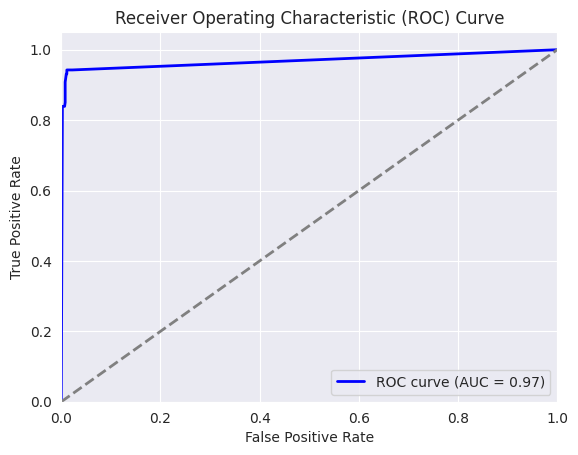

In [50]:
dt_tuned_y_scores = dt_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, dt_tuned_y_scores)

roc_auc = roc_auc_score(y_test, dt_tuned_y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

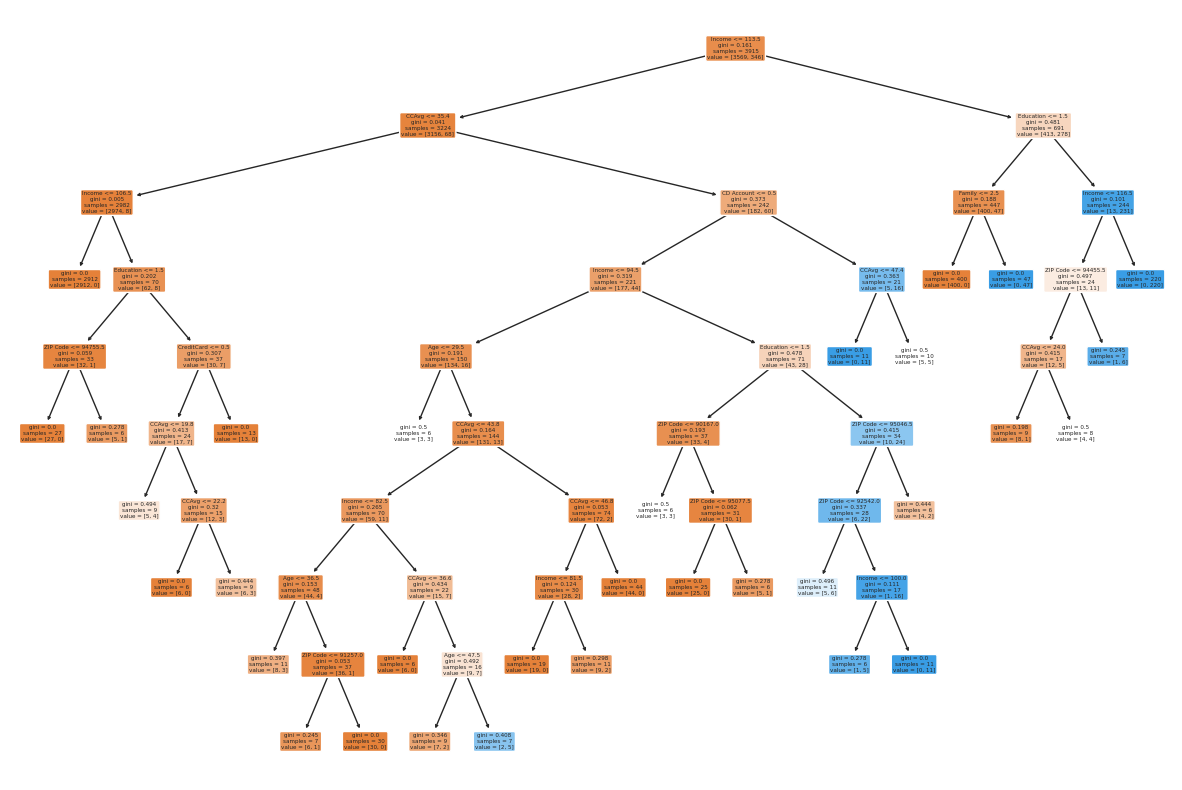

In [51]:
plt.figure(figsize=(15, 10))
plot_tree(dt_tuned, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

진할수록 순수한 노드

In [52]:
for name, value in zip(X_train.columns, dt_tuned.feature_importances_):
     print('{0} : {1:.3f}'.format(name, value))

Age : 0.008
Income : 0.331
ZIP Code : 0.018
Family : 0.146
CCAvg : 0.061
Education : 0.412
Mortgage : 0.000
Securities Account : 0.000
CD Account : 0.021
Online : 0.000
CreditCard : 0.002


<Axes: ylabel='None'>

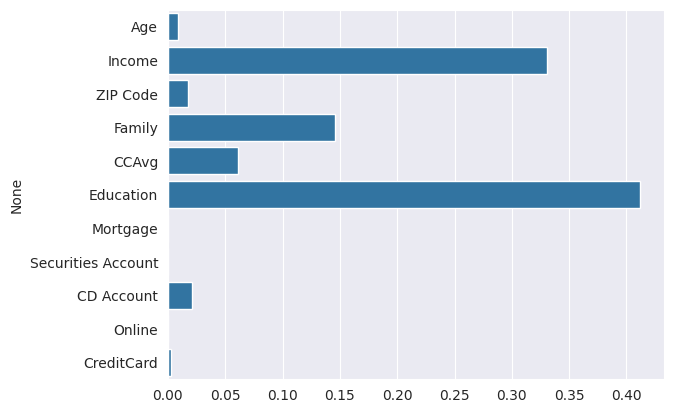

In [53]:
sns.barplot(x=dt_tuned.feature_importances_, y=X_train.columns)

**Education, Income, Family, CCAvg, CD Account, ZIP Code, Age, and CreditCard** turned out to be important features significantly affecting if customers accpeted the offer.

In [54]:
# save the final performance of this decision tree classifier

dt_tuned_result = f1_score(y_test, dt_tuned.predict(X_test), average='binary')
dt_tuned_result

0.8941176470588235

### Bagging

*   Bagging stands for bootstrapped aggregating.
*   In bagging, multiple instances of the same base model are trianed in parallel on different bootstrapped samples of the data, and the results are aggregated through an averaging operation. (classification에서는 majority vote)
*   Bagging is best suited for base models with low bias but high variance, as the averaging operation reduces the variance of the final ensemble model.

  그러니까 n개의 독립적인 관측치 Z1, Z2, ..., Zn이 있고, 각각의 분산이 σ^2인데, 표본평균의 분산은 σ^2/n으로 줄어들게 됨.

  In other words, 관측치들의 집합을 평균냄으로써 분산을 줄임. 따라서 많은 트레이닝 셋이 필요한데, 보통 없으므로 부트스트랩핑을 하는 것.

#### Random Forest

1. What is Random Forest?

*   Random forests are an ensemble learning method that utilizes decision trees as its base model.
*   The trees in a random forest are grown on bootstrapped samples of the training data and a randomly selected subset of features.
*   This helps reduce the correlation between the trees and makes the model more robust to missing data.
*   The goal of random forests is to lower the variance of the model by combining multiple deep decision trees.
*   The combination of bagging and random feature subspace selection results in a more robust and accurate model compared to individual decision trees.

  샘플도 랜덤으로, 피처도 랜덤으로

2. Hyperparameters for Random Forests

*   **n_estimators**: The number of trees in the forest.
*   **criterion**
*   **max_depth**
*   **min_samples_split**
*   **min_samples_leaf**
*   **bootstrap**: Whether or not to sample with replacement when building the trees in the forest.
*   **oob_score**: Whether or not to use out-of-bag samples to estimate the generalization accuracy.

  out-of-bag sample이 뭐냐? 3개의 세트로 나눠 2개는 트레이닝 백으로, 1개는 테스트셋으로 둔다면, 2/3은 트레이닝 셋이랑 겹칠 거고, 나머지 1/3은 피팅에 사용되지 않음. 그래서 out-of-bag observations.

*   **class_weight**
*   **max_features**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(random_state=0)

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3569.0  346.0       1.0     3915.0        3915.0
_______________________________________________
Confusion Matrix: 
 [[3569    0]
 [   0  346]]

Test Result:
Accuracy Score: 98.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.987805   0.987013  0.987743    0.987409      0.987735
recall       0.998879   0.873563  0.987743    0.936221      0.987743
f1-score     0.993311   0.926829  0.987743    0.960070      0.987403
support    892.000000  87.000000  0.987743  979.000000    979.000000
___________________________________________

In [59]:
rf_tuned = RandomForestClassifier(criterion='gini',
                                  max_depth=5,
                                  max_features=None,
                                  min_samples_leaf=3,
                                  min_samples_split=2)

In [60]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=None, min_samples_leaf=3)

In [61]:
print_score(rf_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(rf_tuned, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.90%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.990540    0.971963  0.989017     0.981251      0.988898
recall        0.997478    0.901734  0.989017     0.949606      0.989017
f1-score      0.993997    0.935532  0.989017     0.964765      0.988830
support    3569.000000  346.000000  0.989017  3915.000000   3915.000000
_______________________________________________
Confusion Matrix: 
 [[3560    9]
 [  34  312]]

Test Result:
Accuracy Score: 98.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.988889   0.974684  0.987743    0.981786      0.987627
recall       0.997758   0.885057  0.987743    0.941408      0.987743
f1-score     0.993304   0.927711  0.987743    0.960507      0.987475
support    892.000000  87.000000  0.987743  979.00000

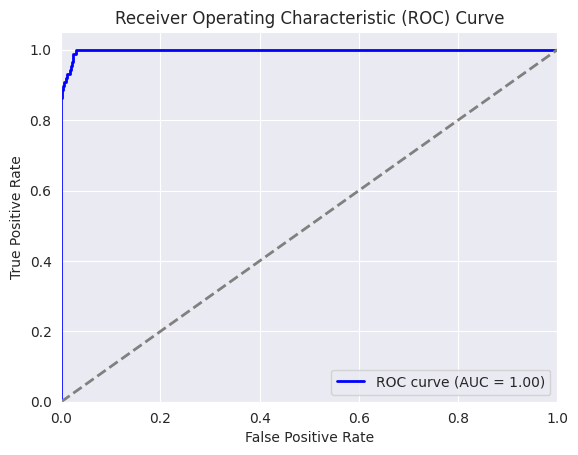

In [62]:
rf_tuned_y_scores = rf_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, rf_tuned_y_scores)

roc_auc = roc_auc_score(y_test, rf_tuned_y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Age : 0.010
Income : 0.390
ZIP Code : 0.007
Family : 0.137
CCAvg : 0.060
Education : 0.375
Mortgage : 0.001
Securities Account : 0.000
CD Account : 0.017
Online : 0.002
CreditCard : 0.001


<Axes: ylabel='None'>

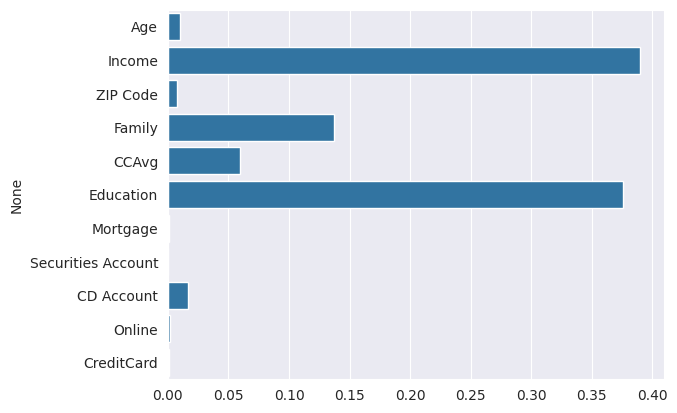

In [63]:
for name, value in zip(X_train.columns, rf_tuned.feature_importances_):
     print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=rf_tuned.feature_importances_, y=X_train.columns)

In [64]:
# save the result
rf_tuned_result = f1_score(y_test, rf_tuned.predict(X_test), average='binary')
rf_tuned_result

0.927710843373494

#### Extra Trees

1. What is Extra Trees?

*   Stands for Extremely Randomized Trees
*   Extra trees are an extension of random forests that use random splits instead of optimizing the splits based on information gain or other criteria.
*   This makes extra trees faster to train than random forests and less prone to overfitting.

1-1. Difference between Random Forests and Extra Trees

*   In a Random Forest, each tree in the ensemble is constructed using a random subset of the features and a random subset of the training samples. The final prediction is made by taking an average or a majority vote of the predictions made by all the trees in the ensemble.
*   Bust in an Extra Trees classifier, each tree in the ensemble is constructed using a random subset of the training samples and **a random threshold value is used for each feature to split the samples.** This allows the classifier more randomness in the construction of the trees.

In [65]:
!pip install scikit-learn

from sklearn.ensemble import ExtraTreesClassifier

In [66]:
et = ExtraTreesClassifier(random_state=0)

In [67]:
et.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [68]:
print_score(et, X_train, y_train, X_test, y_test, train=True)
print_score(et, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3569.0  346.0       1.0     3915.0        3915.0
_______________________________________________
Confusion Matrix: 
 [[3569    0]
 [   0  346]]

Test Result:
Accuracy Score: 98.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.981278   0.985915  0.981614    0.983597      0.981690
recall       0.998879   0.804598  0.981614    0.901738      0.981614
f1-score     0.990000   0.886076  0.981614    0.938038      0.980765
support    892.000000  87.000000  0.981614  979.000000    979.000000
___________________________________________

In [69]:
et_tuned = ExtraTreesClassifier(criterion='gini',
                                max_depth=14,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                n_estimators=70,
                                random_state=0)

In [70]:
et_tuned.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=14, n_estimators=70, random_state=0)

In [71]:
print_score(et_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(et_tuned, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.998043    1.000000  0.998212     0.999021      0.998216
recall        1.000000    0.979769  0.998212     0.989884      0.998212
f1-score      0.999020    0.989781  0.998212     0.994401      0.998204
support    3569.000000  346.000000  0.998212  3915.000000   3915.000000
_______________________________________________
Confusion Matrix: 
 [[3569    0]
 [   7  339]]

Test Result:
Accuracy Score: 98.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.979144   1.000000  0.980592    0.989572      0.980997
recall       1.000000   0.781609  0.980592    0.890805      0.980592
f1-score     0.989462   0.877419  0.980592    0.933441      0.979505
support    892.000000  87.000000  0.980592  979.00000

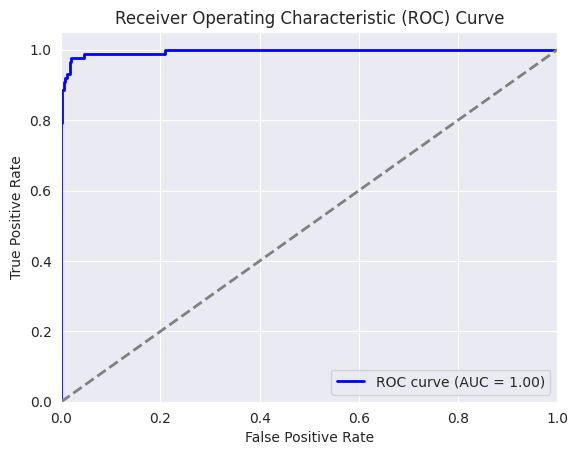

In [72]:
et_tuned_y_scores = et_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, et_tuned_y_scores)

roc_auc = roc_auc_score(y_test, et_tuned_y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Age : 0.040
Income : 0.361
ZIP Code : 0.036
Family : 0.094
CCAvg : 0.169
Education : 0.140
Mortgage : 0.026
Securities Account : 0.011
CD Account : 0.086
Online : 0.014
CreditCard : 0.022


<Axes: ylabel='None'>

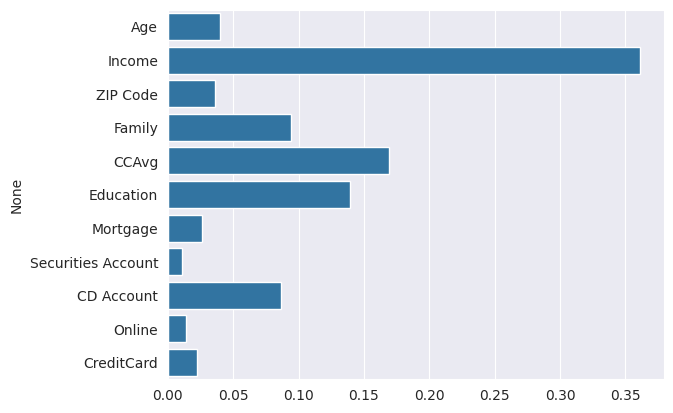

In [144]:
for name, value in zip(X_train.columns, et_tuned.feature_importances_):
     print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=et_tuned.feature_importances_, y=X_train.columns)

In [73]:
# save the result
et_tuned_result = f1_score(y_test, et_tuned.predict(X_test), average='binary')
et_tuned_result

0.8774193548387098

### Boosting

*   Boosting is an iterative technique where multiple instances of the same base model are trained sequentially.
*   At each iteration, the current weak learner is trained based on the previous weak learners and how well they performed on the data.
*   Boosting is best suited for base models with low variance but high bias, as the iterative strategy of learning reduces the bias of the final ensemble model.

#### AdaBoost

1. What is AdaBoost?

*   Stands for Adaptive Boosting.
*   It combines multiple "weak" classifiers to create a strong classifier that makes accurate predictions.
*   The weak classifiers are trained one by one and the algorithm adjusts the weights of the training instances based on their misclassification rates.
*   The idea behind AdaBoost is to focus on the samples that are misclassified by the previous weak classifiers, so that the subsequent weak classifiers can do a better job in classifying those samples.
*   In this way, the algorithm tries to improve the overall accuracy of the classifier by combining the outputs of multiple weak classifiers.

  약한 학습기를 점점 강화

2. AdaBoost Algorithm

Saving AdaBoost.jpg to AdaBoost.jpg


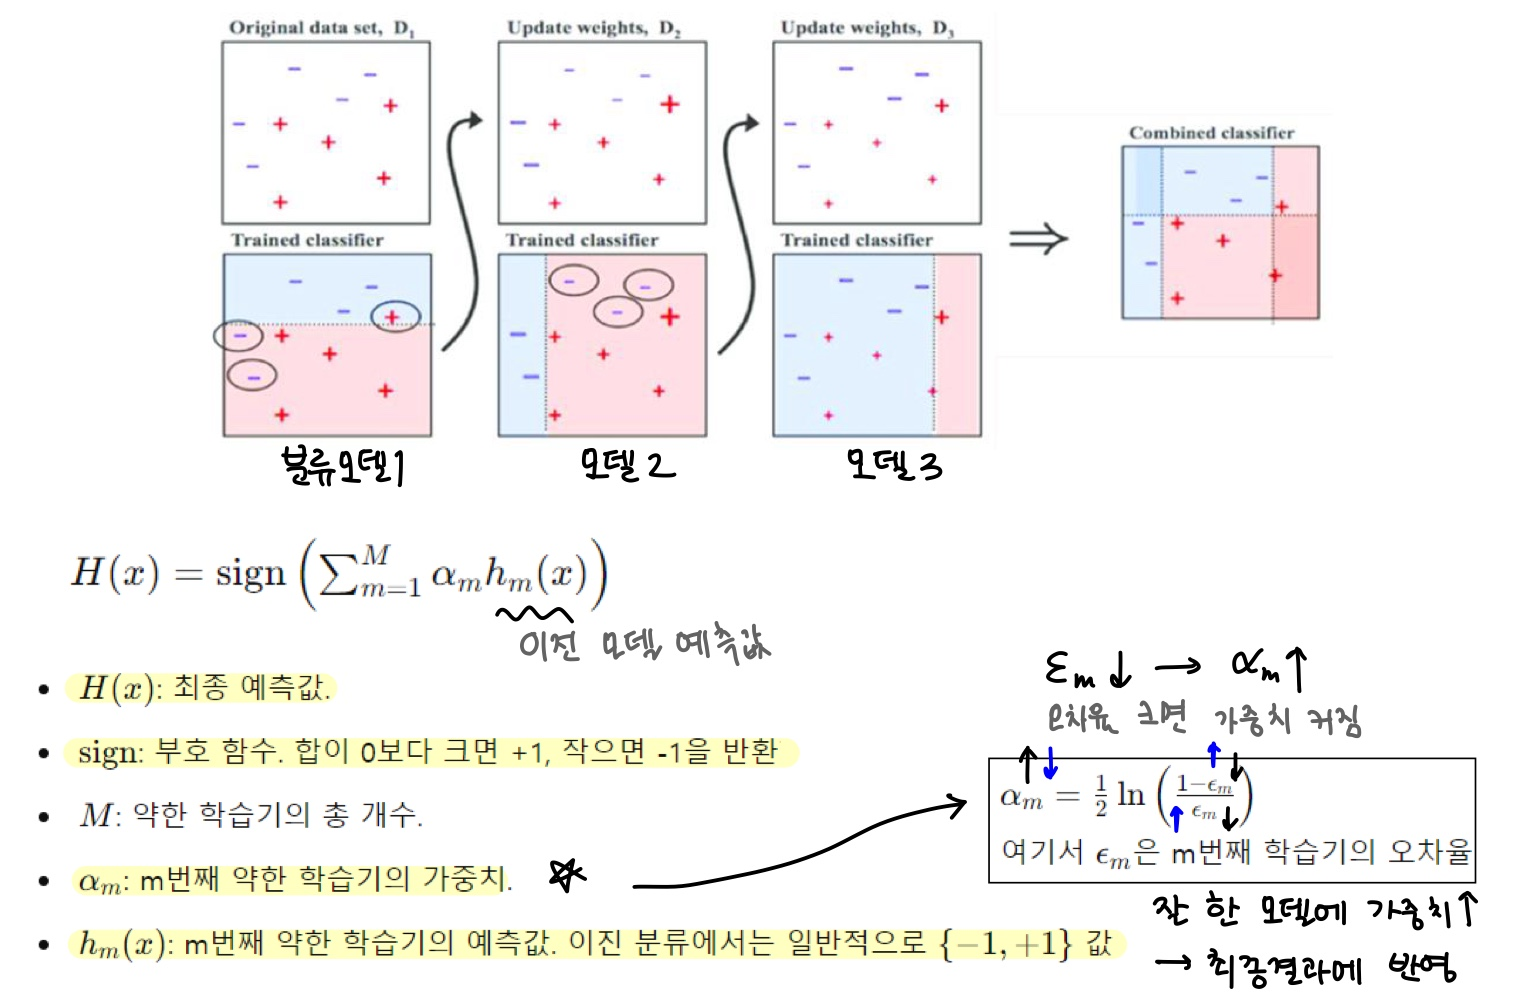

In [74]:
uploaded = files.upload()

display(Image('/content/AdaBoost.jpg'))

3. Hyperparameters for AdaBoost

*   **learning rate**: determines the contribution of each weak learner in the final prediction. A lower learning rate results in a slower convergence, but a more accurate prediction
*   **number of estimators**
*   **estimator**: The algorithm used for the weak learner can be selected based on the problem at hand. 여기에서는 Decision Tree 사

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ada = AdaBoostClassifier(random_state=0)

In [77]:
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [78]:
print_score(ada, X_train, y_train, X_test, y_test, train=True)
print_score(ada, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.06%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.977864    0.883721  0.970626     0.930792      0.969544
recall        0.990193    0.768786  0.970626     0.879490      0.970626
f1-score      0.983990    0.822257  0.970626     0.903123      0.969696
support    3569.000000  346.000000  0.970626  3915.000000   3915.000000
_______________________________________________
Confusion Matrix: 
 [[3534   35]
 [  80  266]]

Test Result:
Accuracy Score: 96.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.973481   0.851351  0.964249    0.912416      0.962627
recall       0.987668   0.724138  0.964249    0.855903      0.964249
f1-score     0.980523   0.782609  0.964249    0.881566      0.962935
support    892.000000  87.000000  0.964249  979.00000

In [79]:
et_for_ada = DecisionTreeClassifier(criterion='gini',
                                    max_features=None,
                                    max_depth=5,
                                    min_samples_leaf=2,
                                    min_samples_split=5,
                                    random_state=0)

ada_tuned = AdaBoostClassifier(base_estimator=et_for_ada,
                               learning_rate=0.8,
                               n_estimators=100,
                               random_state=0)

In [80]:
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_samples_leaf=2,
                                                         min_samples_split=5,
                                                         random_state=0),
                   learning_rate=0.8, n_estimators=100, random_state=0)

In [81]:
print_score(ada_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(ada_tuned, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3569.0  346.0       1.0     3915.0        3915.0
_______________________________________________
Confusion Matrix: 
 [[3569    0]
 [   0  346]]

Test Result:
Accuracy Score: 98.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.988901   0.987179  0.988764    0.988040      0.988748
recall       0.998879   0.885057  0.988764    0.941968      0.988764
f1-score     0.993865   0.933333  0.988764    0.963599      0.988486
support    892.000000  87.000000  0.988764  979.000000    979.000000
___________________________________________

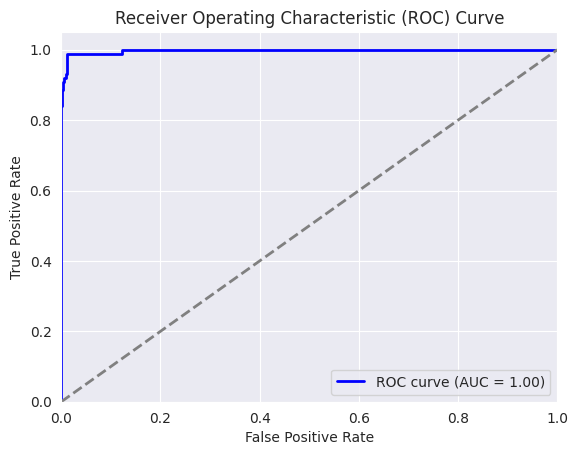

In [82]:
ada_tuned_y_scores = ada_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, ada_tuned_y_scores)

roc_auc = roc_auc_score(y_test, ada_tuned_y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Age : 0.193
Income : 0.150
ZIP Code : 0.184
Family : 0.082
CCAvg : 0.187
Education : 0.089
Mortgage : 0.024
Securities Account : 0.015
CD Account : 0.015
Online : 0.046
CreditCard : 0.016


<Axes: ylabel='None'>

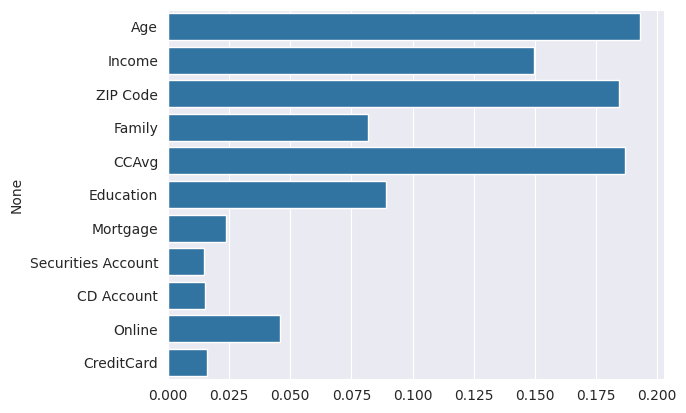

In [145]:
for name, value in zip(X_train.columns, ada_tuned.feature_importances_):
     print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=ada_tuned.feature_importances_, y=X_train.columns)

In [83]:
# save the result
ada_tuned_result = f1_score(y_test, ada_tuned.predict(X_test), average='binary')
ada_tuned_result

0.9333333333333333

#### Gradient Boosting

1. What is Gradient Boosting?

*   It uses the gradient descent optimization method to minimize the loss function and find the beset combination of weak models.
*   It builds the model in a stage-wise manner, where each subsequent model tries to correct the mistakes of the previous model.
*   The algorithm iteratively trains decision trees in such a way that the trees are able to fit the negative gradient of the loss function being optimized.
*   The final prediction is made by combining the outputs of all the individual trees.

  참고) scikit-learn에 있는 GradientBoostingClassifier은 base estimator로 decision tree 사용

  그러니까 약한 학습기를 순차적으로 추가하면서 새로운 학습기가 이전 학습기들의 residual을 줄이도록 학습시키는 것으로, 총 손실 함수를 최소화하는 것이 목표.

  손실 함수로 회귀 문제에서는 MSE를, 분류에서는 Log Loss를 사용

2. Gradient Boosting Algorithm

Saving Gradient Boosting Classifier 1.jpg to Gradient Boosting Classifier 1.jpg


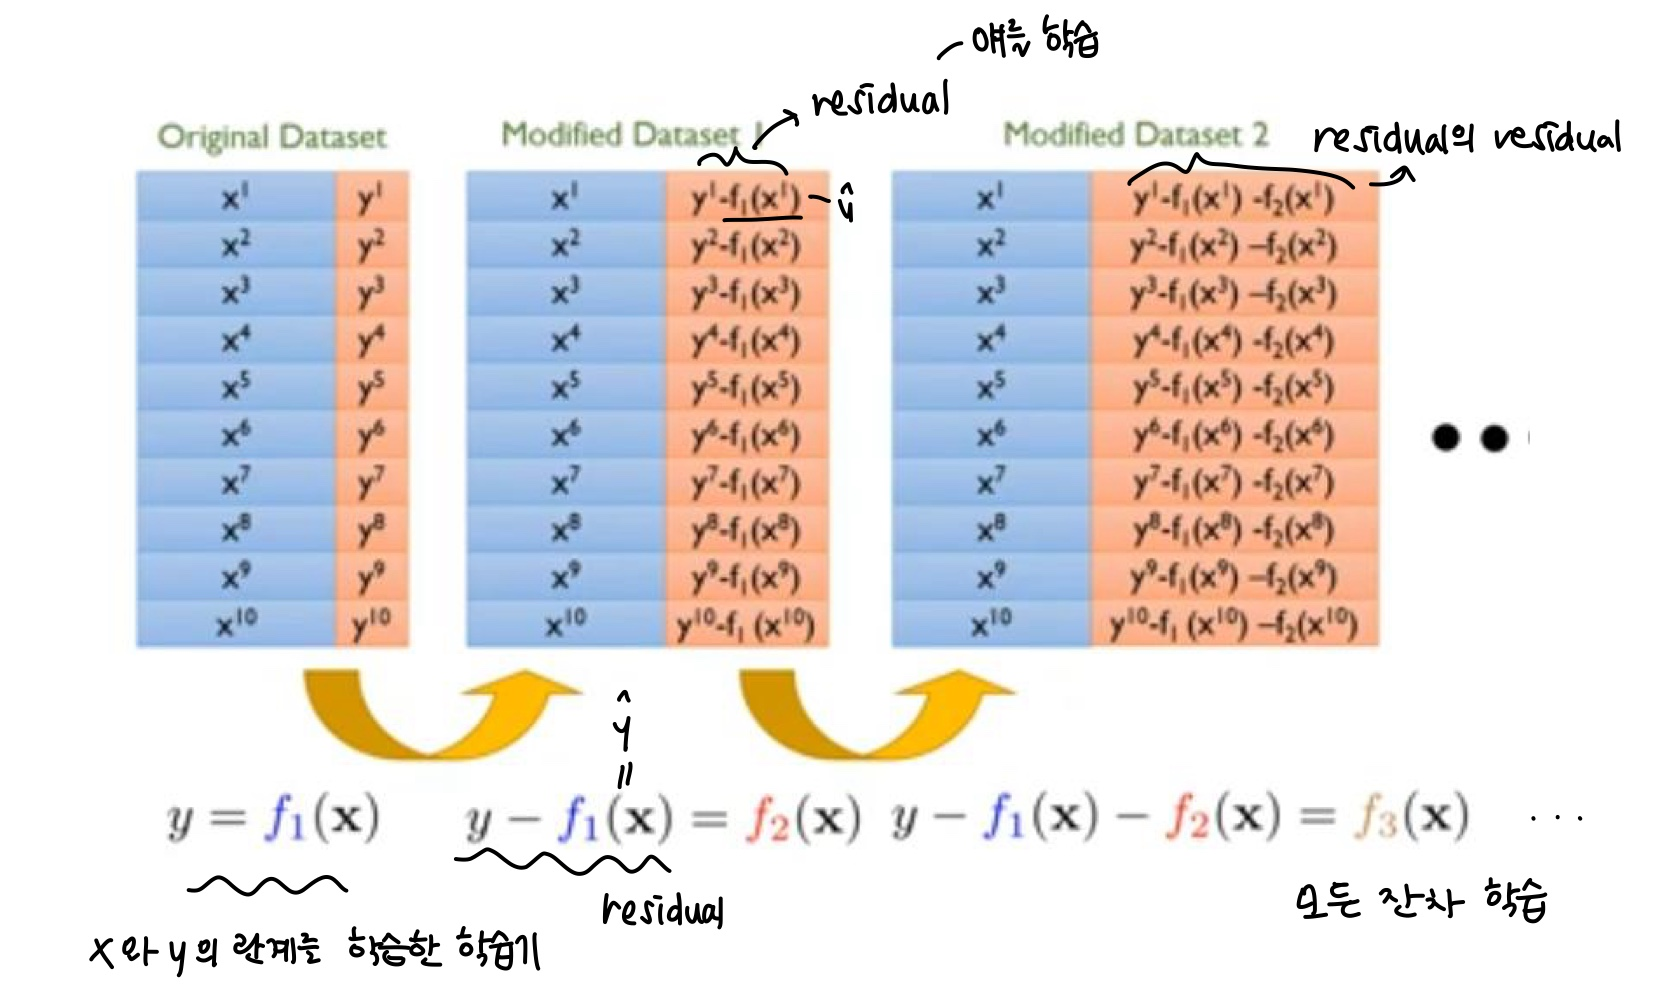

In [84]:
uploaded = files.upload()

display(Image('/content/Gradient Boosting Classifier 1.jpg'))

Saving Gradient Boosting Classifier 2.jpg to Gradient Boosting Classifier 2.jpg


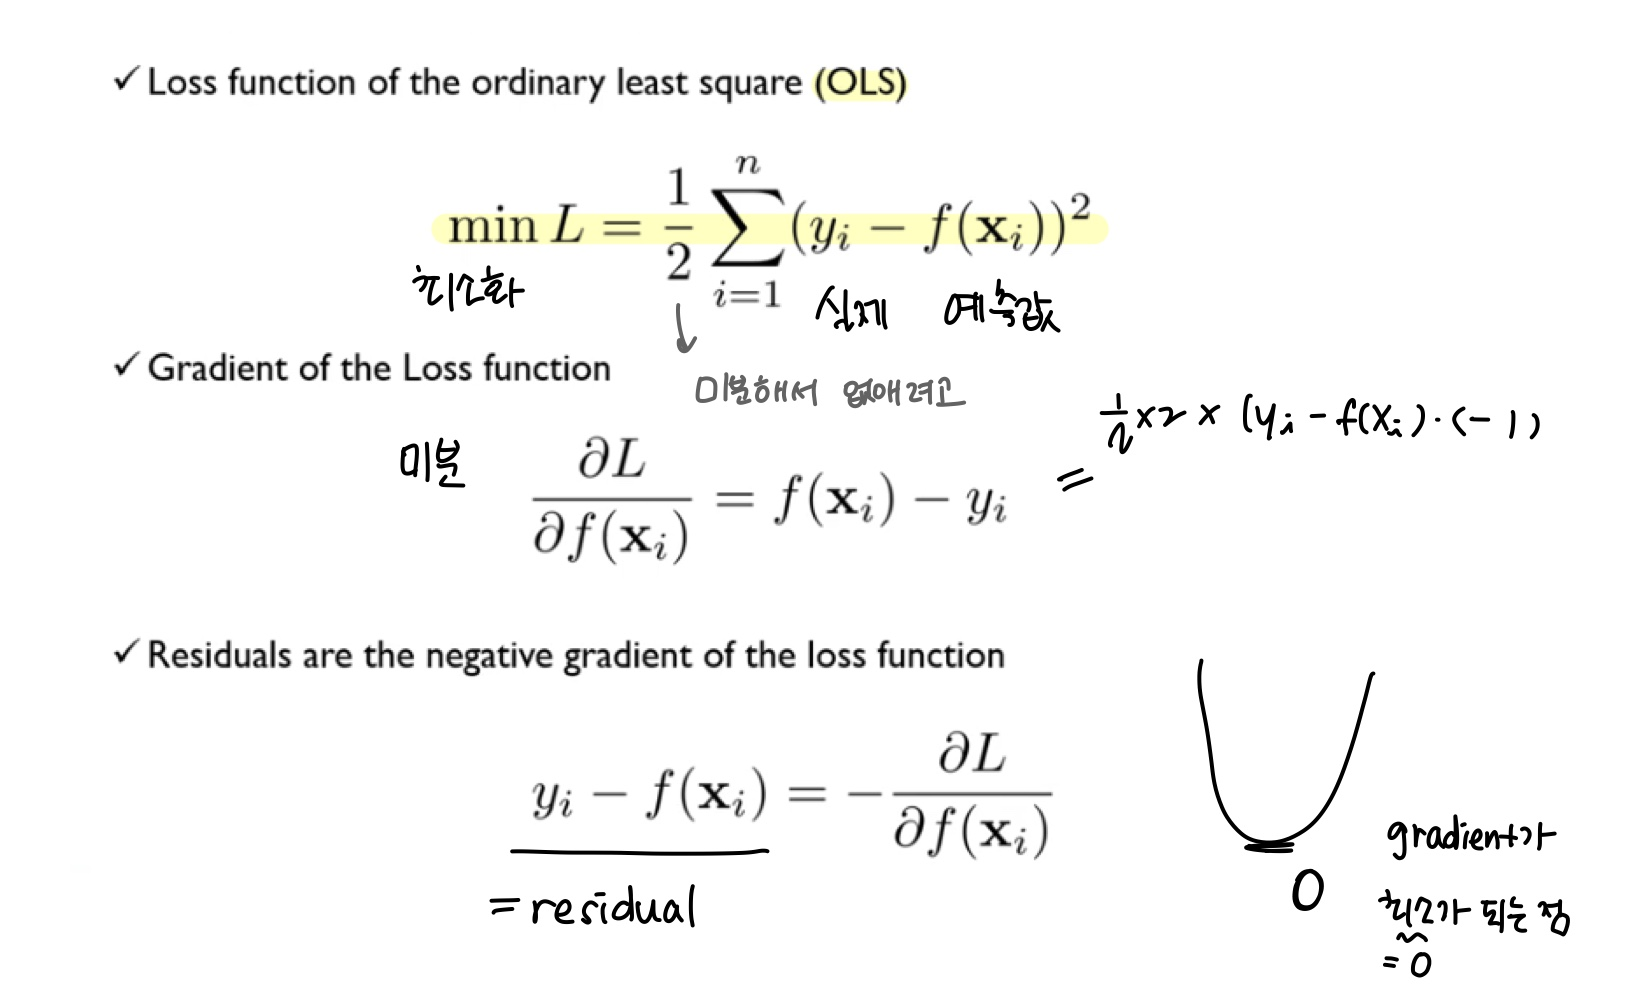

In [85]:
uploaded = files.upload()

display(Image('/content/Gradient Boosting Classifier 2.jpg'))

3. Hyperparameters for Gradient Boosting Classifier

*   **n_estimators**
*   **learning_rate**
*   **max_depth**
*   **min_samples_split**
*   **min_samples_leaf**
*   **max_features**
*   **subsample**: The fraction of samples to be used for fitting the individual base learners.
*   **loss**: The loss function to be optimized. The default loss function is 'deviance' which refers to logistic regression for binary classification and multinomial deviance for multi-class classification problems,
*   **criterion**: The function to measure the quality of a split. Supported criteria are "friedman_mse" for mean squared error, which is used for regression problems, and "entropy" or "gini" for the information gain, which is used for classification problems.

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbc = GradientBoostingClassifier(random_state=0)

In [88]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [89]:
print_score(gbc, X_train, y_train, X_test, y_test, train=True)
print_score(gbc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.39%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.994146    0.990854   0.99387     0.992500      0.993855
recall        0.999159    0.939306   0.99387     0.969233      0.993870
f1-score      0.996646    0.964392   0.99387     0.980519      0.993796
support    3569.000000  346.000000   0.99387  3915.000000   3915.000000
_______________________________________________
Confusion Matrix: 
 [[3566    3]
 [  21  325]]

Test Result:
Accuracy Score: 98.88%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.989989   0.975000  0.988764    0.982494      0.988657
recall       0.997758   0.896552  0.988764    0.947155      0.988764
f1-score     0.993858   0.934132  0.988764    0.963995      0.988551
support    892.000000  87.000000  0.988764  979.00000

In [90]:
gbc_tuned = GradientBoostingClassifier(criterion='friedman_mse',
                                       max_depth=5,
                                       max_features=None,
                                       loss='deviance',
                                       learning_rate=0.2,
                                       n_estimators=100,
                                       subsample=1,
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       random_state=0)

In [91]:
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5,
                           min_samples_leaf=4, random_state=0, subsample=1)

In [92]:
print_score(gbc_tuned, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_tuned, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3569.0  346.0       1.0     3915.0        3915.0
_______________________________________________
Confusion Matrix: 
 [[3569    0]
 [   0  346]]

Test Result:
Accuracy Score: 99.18%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.992205   0.987654  0.991828    0.989930      0.991801
recall       0.998879   0.919540  0.991828    0.959210      0.991828
f1-score     0.995531   0.952381  0.991828    0.973956      0.991696
support    892.000000  87.000000  0.991828  979.000000    979.000000
___________________________________________

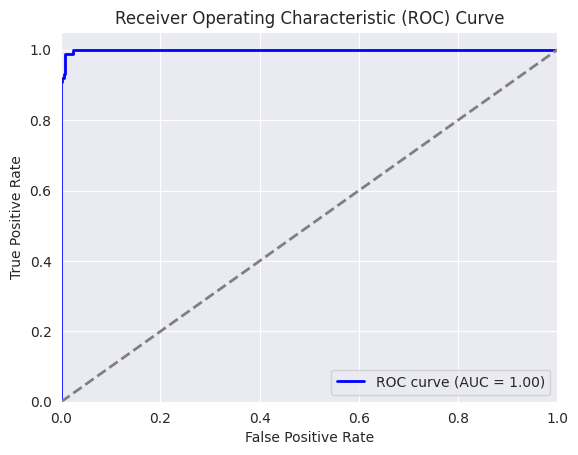

In [93]:
gbc_tuned_y_scores = gbc_tuned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, gbc_tuned_y_scores)

roc_auc = roc_auc_score(y_test, gbc_tuned_y_scores)

plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Age : 0.025
Income : 0.364
ZIP Code : 0.015
Family : 0.152
CCAvg : 0.071
Education : 0.344
Mortgage : 0.003
Securities Account : 0.001
CD Account : 0.019
Online : 0.005
CreditCard : 0.002


<Axes: ylabel='None'>

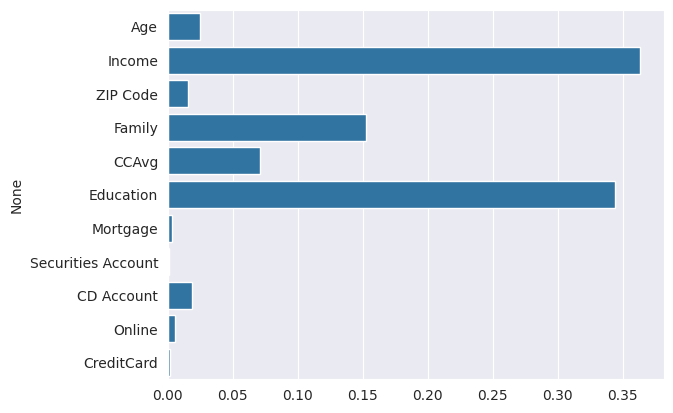

In [146]:
for name, value in zip(X_train.columns, gbc_tuned.feature_importances_):
     print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=gbc_tuned.feature_importances_, y=X_train.columns)

In [94]:
# save the result
gbc_tuned_result = f1_score(y_test, gbc_tuned.predict(X_test), average='binary')
gbc_tuned_result

0.9523809523809523

### Stacking

*   Stacking is a technique where different base models are trained indepently, and a meta-model is trained on top of that to predict outputs based on the outputs of teh base models.
*   In stacking, the base models are used as features for the meta-model, which makes the final predictions based on the combined information from all the base models.

1) Base Models

   * 서로 다른 알고리즘을 사용
   
   * ex. decision tree, svm, logistic regression etc.

2) Meta Model

   * 기본 모델의 예측 결과를 피처로 가져와서 최종 예측을 수행

   * generally simple e.g., linear regression or logistic regression

3) 어떻게 기본 모델들이 학습되고 평가되나요?

   * Cross-validation: 교차 검증 과정에서 예측값이 생성됨. 이 예측값이 메타모델의 학습에 사용되는 것



Saving Stacking.jpg to Stacking.jpg


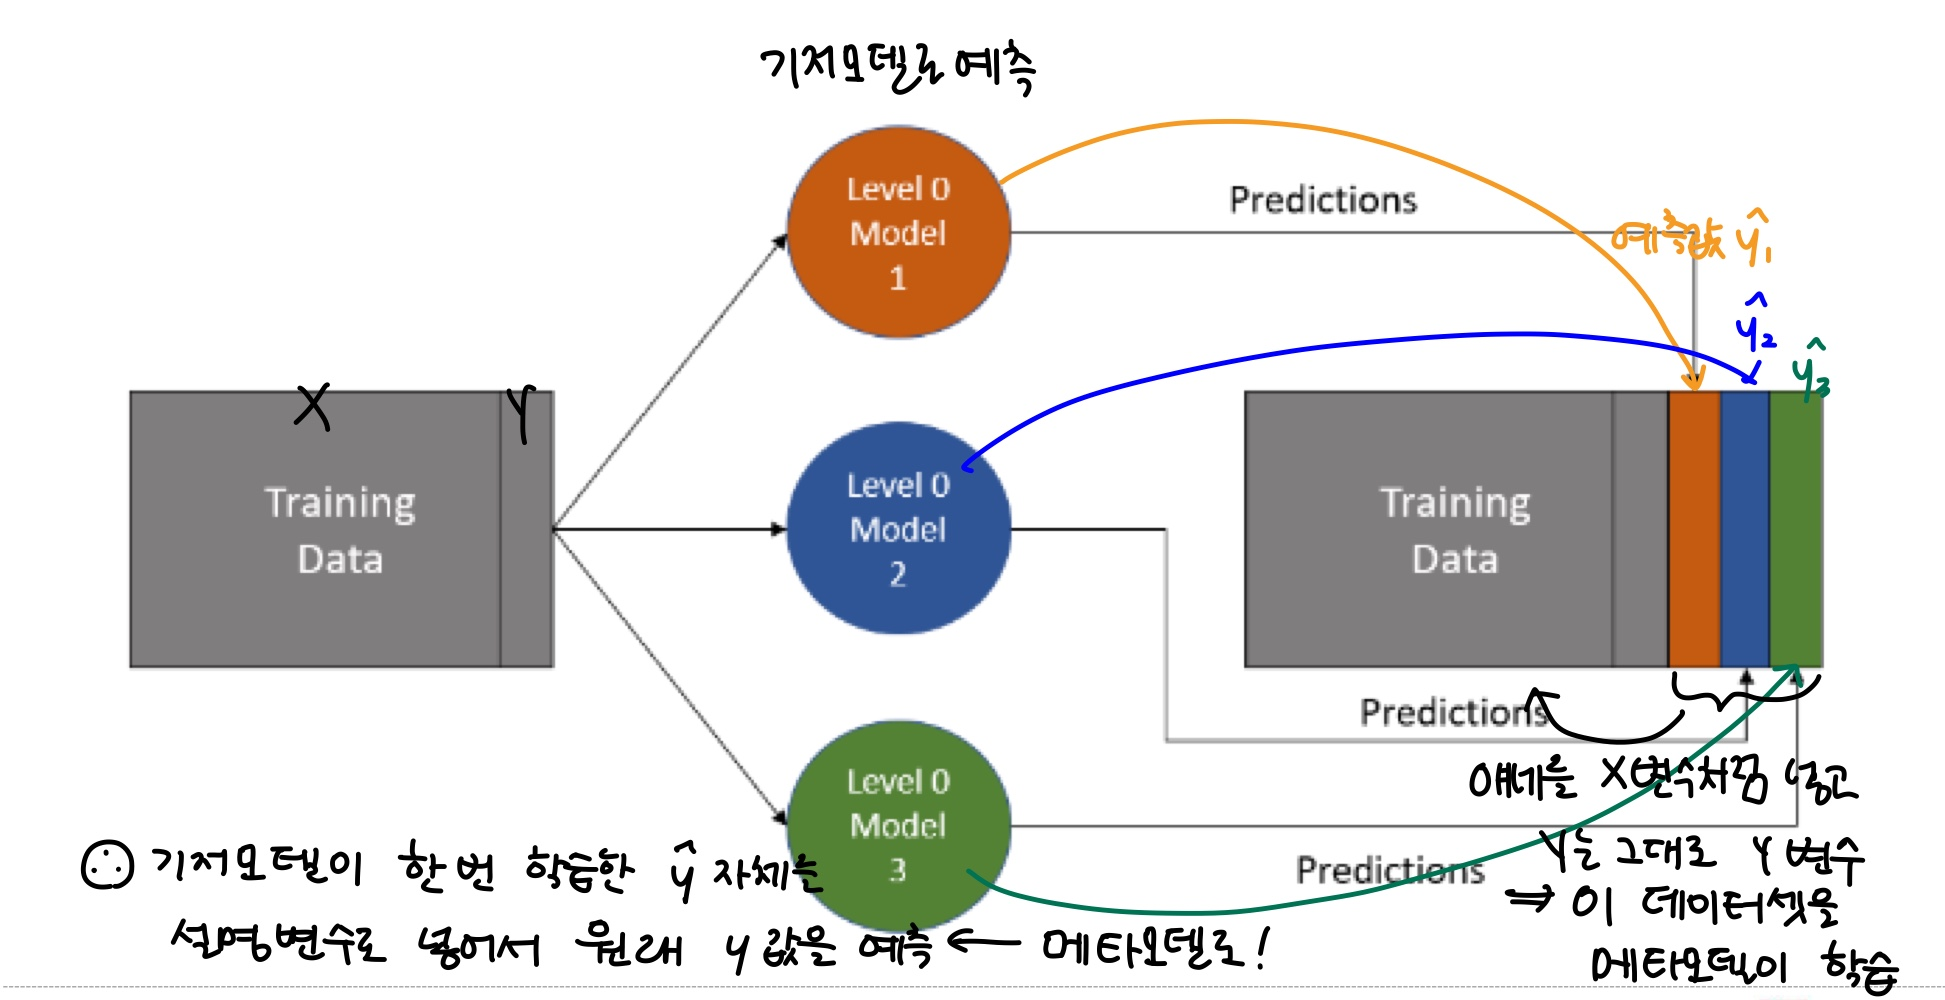

In [95]:
uploaded = files.upload()

display(Image('/content/Stacking.jpg'))

In [96]:
from sklearn.model_selection import KFold

In [105]:
# out-of-fold

ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0
NFOLDS = 5
kf = KFold(n_splits=NFOLDS, random_state=SEED, shuffle=True)

def get_oof(clf, X_train, y_train, X_test):
    oof_train = np.zeros((ntrain, )) # 트레이닝셋에 대한 예측 결과 쌓을 배열
    oof_test = np.zeros((ntest, )) # 테스트셋에 대한 예측 결과 쌓을 배열
    oof_test_skf = np.empty((NFOLDS, ntest)) # 각 폴드에서 테스트셋에 대 예측 결과를 쌓을 배열

    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        X_tr = X_train.iloc[train_index].values
        y_tr = y_train.iloc[train_index].values
        X_te = X_train.iloc[test_index].values # 트레이닝셋에서 다시 테스트셋을 스플릿

        clf.fit(X_tr, y_tr) # 모델 학습

        oof_train[test_index] = clf.predict(X_te) # 예측값 쌓아
        oof_test_skf[i, :] = clf.predict(X_test) # i번째 폴드의 예측값 쌓아

    oof_test[:] = oof_test_skf.mean(axis=0) # 모든 폴드에 대한 예측 결과 평균 내
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [107]:
dt_tuned_oof_train, dt_tuned_oof_test = get_oof(dt_tuned, X_train, y_train, X_test)
rf_tuned_oof_train, rf_tuned_oof_test = get_oof(rf_tuned, X_train, y_train, X_test)
et_tuned_oof_train, et_tuned_oof_test = get_oof(et_tuned, X_train, y_train, X_test)
ada_tuned_oof_train, ada_tuned_oof_test = get_oof(ada_tuned, X_train, y_train, X_test)
gbc_tuned_oof_train, gbc_tuned_oof_test = get_oof(gbc_tuned, X_train, y_train, X_test)

이 기본 모델 예측값들을 메타 모델 피처로 넣어보자

In [112]:
base_predictions_train = pd.DataFrame({'DecisionTree': dt_tuned_oof_train.ravel(),
                                       'RandomForest': rf_tuned_oof_train.ravel(),
                                       'ExtraTrees': et_tuned_oof_train.ravel(),
                                       'AdaBoost': ada_tuned_oof_train.ravel(),
                                       'GradientBoosting': gbc_tuned_oof_train.ravel()})
base_predictions_train.head()

DecisionTree  RandomForest  ExtraTrees  AdaBoost  GradientBoosting
0           0.0           0.0         0.0       0.0               0.0
1           0.0           0.0         0.0       0.0               0.0
2           0.0           0.0         0.0       0.0               0.0
3           0.0           0.0         0.0       0.0               0.0
4           0.0           0.0         0.0       0.0               0.0

In [114]:
X_train_new = np.concatenate((dt_tuned_oof_train, rf_tuned_oof_train, et_tuned_oof_train,
                              ada_tuned_oof_train, gbc_tuned_oof_train), axis=1)
X_train_new

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [117]:
X_test_new = np.concatenate((dt_tuned_oof_test, rf_tuned_oof_test, et_tuned_oof_test,
                             ada_tuned_oof_test, gbc_tuned_oof_test), axis=1)
X_test_new

# 평균이니까 소수점 가능

array([[0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , 0. , 0. ],
       [0.8, 0.8, 1. , 1. , 1. ],
       [0. , 0. , 0. , 0. , 0. ]])

Meta model: logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logreg = LogisticRegression(random_state=0)

In [120]:
logreg.fit(X_train_new, y_train)

LogisticRegression(random_state=0)

In [121]:
print_score(logreg, X_train_new, y_train, X_test_new, y_test, train=True)
print_score(logreg, X_train_new, y_train, X_test_new, y_test, train=False)

Train Result:
Accuracy Score: 98.54%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.987778    0.958730  0.985441     0.973254      0.985211
recall        0.996358    0.872832  0.985441     0.934595      0.985441
f1-score      0.992049    0.913767  0.985441     0.952908      0.985131
support    3569.000000  346.000000  0.985441  3915.000000   3915.000000
_______________________________________________
Confusion Matrix: 
 [[3556   13]
 [  44  302]]

Test Result:
Accuracy Score: 98.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.988889   0.974684  0.987743    0.981786      0.987627
recall       0.997758   0.885057  0.987743    0.941408      0.987743
f1-score     0.993304   0.927711  0.987743    0.960507      0.987475
support    892.000000  87.000000  0.987743  979.00000

In [122]:
# save the result
logreg_result = f1_score(y_test, logreg.predict(X_test_new), average='binary')
logreg_result

0.927710843373494

### Conclusion

Which one is the best model?

In [128]:
results = [dt_tuned_result, rf_tuned_result, et_tuned_result, ada_tuned_result, gbc_tuned_result, logreg_result]
results = pd.DataFrame(results, index=['DecisionTree', 'RandomForest', 'ExtraTrees', 'AdaBoost', 'GradientBoosting', 'LogisticRegression'])
results.columns = ['f1_score']
results

f1_score
DecisionTree        0.894118
RandomForest        0.927711
ExtraTrees          0.877419
AdaBoost            0.933333
GradientBoosting    0.952381
LogisticRegression  0.927711

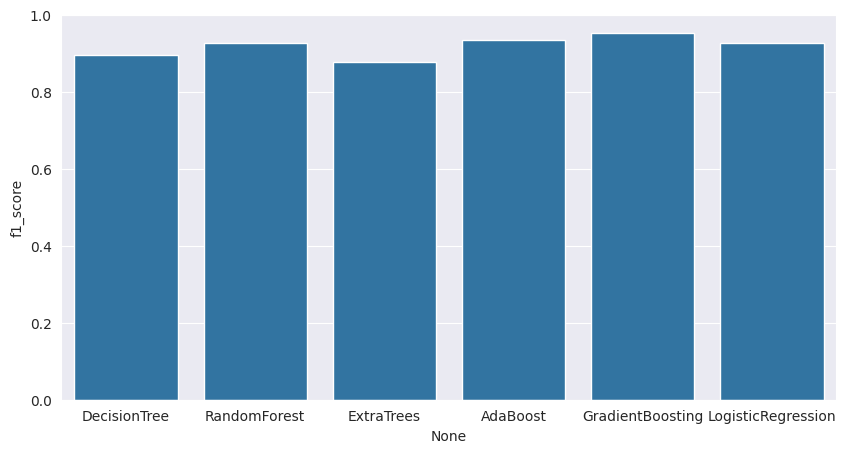

In [129]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results.index, y='f1_score', data=results)
plt.show()

In [139]:
best_model = results['f1_score'].idxmax()
best_f1_score = results.loc[best_model, 'f1_score']

print(f"Best Model: {best_model}")
print(f"Best f1 score: {best_f1_score}")

Best Model: GradientBoosting
Best f1 score: 0.9523809523809523


In [143]:
print(f"Accuracy = {accuracy_score(y_test, gbc_tuned.predict(X_test))}")
print(f"F1-score = {f1_score(y_test, gbc_tuned.predict(X_test), average='binary')}")
print(f"Precision = {precision_score(y_test, gbc_tuned.predict(X_test))}")
print(f"Recall = {recall_score(y_test, gbc_tuned.predict(X_test))}")
print(f"AUC = {roc_auc_score(y_test, gbc_tuned.predict(X_test))}")

Accuracy = 0.9887640449438202
F1-score = 0.934131736526946
Precision = 0.975
Recall = 0.896551724137931
AUC = 0.9471547858357817


Age : 0.025
Income : 0.364
ZIP Code : 0.015
Family : 0.152
CCAvg : 0.071
Education : 0.344
Mortgage : 0.003
Securities Account : 0.001
CD Account : 0.019
Online : 0.005
CreditCard : 0.002


<Axes: ylabel='None'>

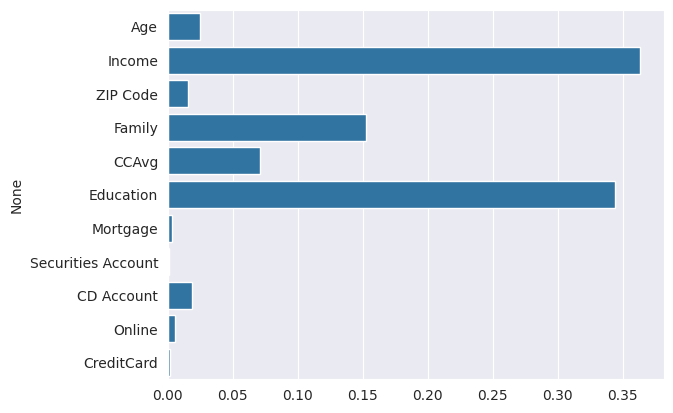

In [149]:
for name, value in zip(X_train.columns, gbc_tuned.feature_importances_):
     print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=gbc_tuned.feature_importances_, y=X_train.columns)

Among all the tested classifiers, Gradient Boosting Classifier had the best performance in identifying potential loan customers. Based on the feature importance graph above, **Income, Education, Family, CCAvg** play the most important role in identifying potential loan customers and **Age, CD Account, ZIP Code, Online, Mortgage, and CreditCard** do have effects on the response as well.